<a href="https://colab.research.google.com/github/gbiamgaurav/Tensorflow/blob/main/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
## Load and split dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step


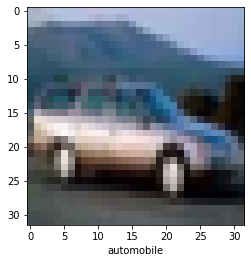

In [8]:
## Let's look at a one image

IMG_INDEX = 4 # change this to view other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

### CNN Architecture

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [11]:
model.summary() # lets look at our model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

### Adding Dense Layers

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

### Training

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5060 - accuracy: 0.4523 - val_loss: 1.2672 - val_accuracy: 0.5463
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1558 - accuracy: 0.5903 - val_loss: 1.0547 - val_accuracy: 0.6297
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0073 - accuracy: 0.6471 - val_loss: 1.0175 - val_accuracy: 0.6416
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9106 - accuracy: 0.6802 - val_loss: 0.9355 - val_accuracy: 0.6753
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8306 - accuracy: 0.7098 - val_loss: 0.8858 - val_accuracy: 0.6951
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7738 - accuracy: 0.7292 - val_loss: 0.8624 - val_accuracy: 0.7070
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7307 - accuracy: 0.7428 - val_loss: 0.9094 -

### Evaluating the Model

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.8732 - accuracy: 0.7108 - 3s/epoch - 10ms/step
0.7107999920845032


### Working with Small Datasets

### Data Augmentation

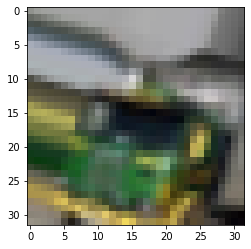

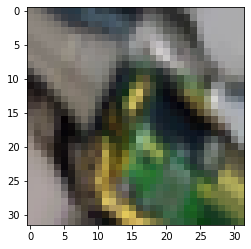

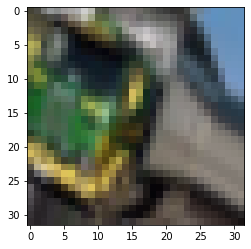

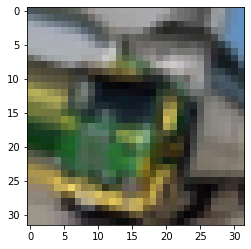

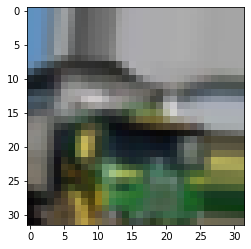

In [16]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# pick an image to transform
test_img = train_images[14]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break
    
plt.show()    